## Introducing our data set: World Happiness Report
We'll use the [World Happiness Report](http://worldhappiness.report/), which is a survey about the state of global happiness. The report ranks more than 150 countries by their happiness levels, and has been published almost every year since 2012. We'll use data collected in the years 2015, 2016, and 2017, which is available for [download](https://s3.amazonaws.com/dq-content/blog/pivot_table/data.csv) if you'd like to follow along. We're running python 3.6 and pandas 0.19.

## Data Dictionary

- Country - Name of the country.
- Region - Region the country belongs to.
- Happiness Rank - Rank Based on Happiness Score.
- Happiness Score - Score assigned to each country
- Economy - GDP per capita.
- Family - Family support.
- Health - Life Expectancy.
- Freedom - freedom to make life choices
- Trust - perceptions of corruption
- Generosity - perceptions of generosity
- Dystopia - each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

In [1]:
import pandas as pd
import numpy as np

# Read the data.
data = pd.read_csv('data.csv',index_col=0)
# Sort data by Year - ascending. Happiness Score - descending.
data.sort_values(['Year', 'Happiness Score'], ascending=[True,False], inplace=True)
# display first 10 rows.
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
140,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [2]:
greater_than_3 = data['Happiness Rank'] > 3
less_than_5 = data['Happiness Rank'] < 5
data[greater_than_3 & less_than_5]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
108,Norway,Western Europe,4.0,7.522,1.45900,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
273,Norway,Western Europe,4.0,7.498,1.57744,1.126900,0.795790,0.596090,0.357760,0.378950,2.664650,2016
471,Switzerland,Western Europe,4.0,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017


In [3]:
# Find out number of rows and columns
print('Our data has {} rows and {} columns\n'.format(data.shape[0], data.shape[1]))

# find out missing values in each column
print(data.info())
print('\n')

# Explore data summary.
data.describe()

Our data has 495 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 141 to 473
Data columns (total 12 columns):
Country                          495 non-null object
Region                           495 non-null object
Happiness Rank                   470 non-null float64
Happiness Score                  470 non-null float64
Economy (GDP per Capita)         470 non-null float64
Family                           470 non-null float64
Health (Life Expectancy)         470 non-null float64
Freedom                          470 non-null float64
Trust (Government Corruption)    470 non-null float64
Generosity                       470 non-null float64
Dystopia Residual                470 non-null float64
Year                             495 non-null int64
dtypes: float64(9), int64(1), object(2)
memory usage: 50.3+ KB
None




,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


## Average Happiness Scores by Years

In [3]:
pd.pivot_table(data, index='Year',values='Happiness Score')

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


Average Happiness Score was highest in 2016. 

## Average Happiness Scores by Region

In [4]:
df = pd.pivot_table(data, index='Region', values='Happiness Score')
df.sort_values('Happiness Score',ascending=False, inplace=True)
df

,Happiness Score
Region,
Australia and New Zealand,7.302500
North America,7.227167
Western Europe,6.693000
Latin America and Caribbean,6.069074
Eastern Asia,5.632333
Middle East and Northern Africa,5.387879
Central and Eastern Europe,5.371184
Southeastern Asia,5.364077
Southern Asia,4.590857


In [9]:
df['Happiness_category'] = pd.cut(df['Happiness Score'],3)
df

,Happiness Score,Happiness_category
Region,,
Australia and New Zealand,7.302500,"(6.252, 7.303]"
North America,7.227167,"(6.252, 7.303]"
Western Europe,6.693000,"(6.252, 7.303]"
Latin America and Caribbean,6.069074,"(5.201, 6.252]"
Eastern Asia,5.632333,"(5.201, 6.252]"
Middle East and Northern Africa,5.387879,"(5.201, 6.252]"
Central and Eastern Europe,5.371184,"(5.201, 6.252]"
Southeastern Asia,5.364077,"(5.201, 6.252]"
Southern Asia,4.590857,"(4.148, 5.201]"


## Creating a multi index pivot table using Region and Year columns.

In [5]:
pd.pivot_table(data, index=['Region', 'Year'], values='Happiness Score')

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

## Creating pivot table using index and columns

In [6]:
pd.pivot_table(data, index='Region', columns='Year', values='Happiness Score')

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


## Creating plots using pivot tables

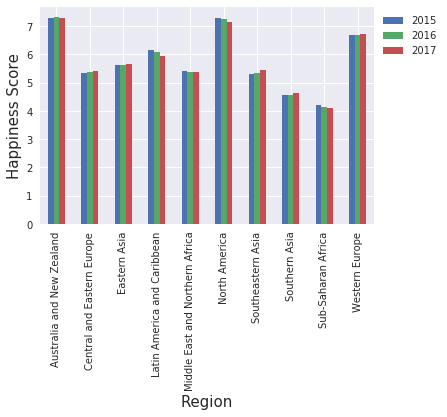

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.pivot_table(data, index='Region', columns='Year', values='Happiness Score')
sns.set() # use seaborn style.
ax = df.plot.bar()
ax.set_ylabel('Happiness Score',size=15)
ax.set_xlabel('Region', size=15)
ax.legend(bbox_to_anchor=(1,1))

## Manipulating the data using aggfunc

In [8]:
d = pd.pivot_table(data, index='Region', values='Happiness Score', aggfunc=[np.mean,np.median,min,max,np.std])
d.sort_values(('mean', 'Happiness Score'), ascending=False, inplace=True)
d

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
North America,7.227167,7.2175,6.993,7.427,0.179331
Western Europe,6.693000,6.9070,4.857,7.587,0.777886
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637


Looks like some regions have extreme values that might affect our average more than we'd like them to. For example, **Middle East and Northern Africa** region have a high standard deviation, so we might want to remove extreme values. Let's see how many values we're calculating for each region. This might affect the representation we're seeing. For example, **Australia and New Zealand** have a very low standard deviation and are ranked happiest for all three years, but we can also assume they only account for two countries.

## Passing custom functions to pivot table
We will now calculate the average number of countries covered by each region per year.

In [9]:
def no_of_countries(values):
    return values.shape[0]/3 #we divide by 3 because we find average number of countries across 3 years
                                                            
pd.pivot_table(data, index='Region', values='Happiness Score', 
               aggfunc=[np.mean,np.median,min,max,np.std,no_of_countries])

,mean,median,min,max,std,no_of_countries
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936,2.0
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274,29.0
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100,8.0
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157,24.0
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656,20.0
North America,7.227167,7.2175,6.993,7.427,0.179331,2.0
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637,9.0
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978,7.0


We can see that **Australia and New Zealand** and **North America** have the highest Happiness Scores but only cover 2 countries. Whereas **Sub-Saharan Africa** has the lowest Happiness Score but covers 43 countries.

## Using custom functions to remove outliers.
we will now create a function that will calculate the mean of the 25th and the 75th percentile to eliminate the effect of outliers on the mean.

In [10]:
def remove_outliers(values):
    mid_quantiles = values.quantile([0.25, 0.75])
    return np.mean(mid_quantiles)

pd.pivot_table(data, index='Region', values='Happiness Score',
               aggfunc=[np.mean, remove_outliers, no_of_countries])

,mean,remove_outliers,no_of_countries
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.0
Central and Eastern Europe,5.371184,5.449250,29.0
Eastern Asia,5.632333,5.610125,8.0
Latin America and Caribbean,6.069074,6.192750,24.0
Middle East and Northern Africa,5.387879,5.508500,20.0
North America,7.227167,7.244875,2.0
Southeastern Asia,5.364077,5.470125,9.0
Southern Asia,4.590857,4.707500,7.0


Removing the outliers mostly affected the regions with a higher number of countries, which makes sense. We can see **Western Europe** (average of 21 countries surveyed per year) improved its ranking. Unfortunately, **Sub-Saharan Africa** (average of 39 countries surveyed per year) received an even lower ranking when we removed the outliers.

## Categorization using string manipulation.
we can use string munging to extract data for each continent.

In [11]:
table = pd.pivot_table(data, index = 'Region', values='Happiness Score', aggfunc=[np.mean, remove_outliers])
table

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Australia and New Zealand,7.302500,7.299125
Central and Eastern Europe,5.371184,5.449250
Eastern Asia,5.632333,5.610125
Latin America and Caribbean,6.069074,6.192750
Middle East and Northern Africa,5.387879,5.508500
North America,7.227167,7.244875
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [12]:
# Data for Asia.
table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [13]:
# Data for Europe.
table[table.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


The difference of Happiness Scores between **European countries** is greater than that of **Asian countries**. In all cases removing outliers increases the mean except for **Eastern Asia**.

## Querying pivot tables

In [14]:
table = pd.pivot_table(data, index=['Region','Year'], values='Happiness Score', aggfunc=[np.mean, remove_outliers])
table.query('Year == [2015,2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

## Handling missing data
we will now divide the total range of happiness scores into 3 quantiles and find out the number of countries in each quantile.

In [15]:
scores = pd.qcut(data['Happiness Score'],3)
table = pd.pivot_table(data, index=['Region',scores], values='Happiness Score',
                       aggfunc='count',fill_value=0,margins=True,margins_name='Total count')
table

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Central and Eastern Europe      (2.692, 4.79]                 15
                                (4.79, 5.895]                 58
                                (5.895, 7.587]                14
Eastern Asia                    (2.692, 4.79]                  0
                                (4.79, 5.895]                 11
                                (5.895, 7.587]                 7
Latin America and Caribbean     (2.692, 4.79]                  4
                                (4.79, 5.895]                 19
                                (5.895, 7.587]                45
Middle East and Northern Africa (2.692, 4.79]                 18
                                (4.79, 5.895]                 20
                                (5.895, 7.587]                20
North America                   (2.692, 4.79]                  0
                                (4.79, 5.895]                  0
                                (5.895, 7.587]                 6
Southeastern Asia               (2.692, 4.79]                  6
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                 8
Southern Asia                   (2.692, 4.79]                 13
                                (4.79, 5.895]                  8
                                (5.895, 7.587]                 0
Sub-Saharan Africa              (2.692, 4.79]                101
                                (4.79, 5.895]                 16
                                (5.895, 7.587]                 0
Western Europe                  (2.692, 4.79]                  0
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                51
Total count                                                  470